In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [185]:
# Load dataset
flights_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\flights_airport_iata.csv", low_memory=False)
weather_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\weather_iata.csv", low_memory=False)

In [186]:
print(flights_data.columns)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'latitude', 'longitude',
       'iata_dest', 'airport_name_dest', 'latitude_dest', 'longitude_dest',
       'state_abbr_dest', 'airport_ref', 'airport_ident', 'type_of_airport',
       'airport_name', 'elevation_ft', 'origin_state.1', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft'],
      

In [187]:
print(weather_data.columns)

Index(['latitude', 'longitude', 'elevation', 'date', 'prcp', 'snow', 'snwd',
       'tmax', 'tmin', 'tobs', 'city', 'state_abbr_x', 'iata', 'airport_name',
       'state_abbr_y'],
      dtype='object')


In [188]:
# Inspect the data

In [189]:
print(flights_data.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...      id  \
0         cvg  cincinnati       msp  minneapolis          1234  ...  240940   
1         cvg  cincinnati       msp  minneapolis          1234  ...  240941   
2         cvg  cincinnati       msp  minneapolis          1234  ...  240943   
3         cvg  cincinnati       msp  minneapolis          1234  ...  240942   
4         dsm  des moines       msp  minneapolis          1750  ...  244170   

   length_ft  width_ft  surface  lighted  closed  le_ident  \
0    1

In [190]:
print(flights_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094416 entries, 0 to 15094415
Data columns (total 59 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   day_of_week                int64  
 1   date                       object 
 2   op_unique_carrier          object 
 3   tail_num                   object 
 4   op_carrier_fl_num          int64  
 5   origin_iata                object 
 6   origin_city                object 
 7   dest_iata                  object 
 8   dest_city                  object 
 9   crs_dep_time               int64  
 10  dep_time                   float64
 11  taxi_out                   float64
 12  wheels_off                 float64
 13  wheels_on                  float64
 14  taxi_in                    float64
 15  crs_arr_time               int64  
 16  arr_time                   float64
 17  cancelled                  float64
 18  diverted                   float64
 19  crs_elapsed_time           float64
 20  

In [191]:
print(weather_data.head())

   latitude  longitude  elevation        date  prcp  snow  snwd  tmax  tmin  \
0     31.95     -85.13  86.800003  2024-01-01  0.00   NaN   NaN  65.0  32.0   
1     31.95     -85.13  86.800003  2024-01-02  0.00   NaN   NaN  55.0  27.0   
2     31.95     -85.13  86.800003  2024-01-03  0.14   NaN   NaN  43.0  27.0   
3     31.95     -85.13  86.800003  2024-01-04  0.00   NaN   NaN  58.0  31.0   
4     31.95     -85.13  86.800003  2024-01-05  0.23   NaN   NaN  61.0  29.0   

   tobs                          city state_abbr_x iata  airport_name  \
0   NaN  eufaula weedon field airport           al  euf  weedon field   
1   NaN  eufaula weedon field airport           al  euf  weedon field   
2   NaN  eufaula weedon field airport           al  euf  weedon field   
3   NaN  eufaula weedon field airport           al  euf  weedon field   
4   NaN  eufaula weedon field airport           al  euf  weedon field   

  state_abbr_y  
0           al  
1           al  
2           al  
3           al  
4

In [192]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146022 entries, 0 to 146021
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   latitude      146022 non-null  float64
 1   longitude     146022 non-null  float64
 2   elevation     145679 non-null  float64
 3   date          146022 non-null  object 
 4   prcp          139097 non-null  float64
 5   snow          51349 non-null   float64
 6   snwd          47881 non-null   float64
 7   tmax          139412 non-null  float64
 8   tmin          139384 non-null  float64
 9   tobs          8613 non-null    float64
 10  city          146022 non-null  object 
 11  state_abbr_x  146022 non-null  object 
 12  iata          146022 non-null  object 
 13  airport_name  146022 non-null  object 
 14  state_abbr_y  146022 non-null  object 
dtypes: float64(9), object(6)
memory usage: 16.7+ MB
None


In [193]:
# Drop the 'state_abbr_y' column
weather_data = weather_data.drop(columns=['state_abbr_y', 'airport_name'])

# Rename 'state_abbr_x' to 'state'
weather_data = weather_data.rename(columns={'state_abbr_x': 'state'})

# Display the updated DataFrame
print(weather_data.columns)

Index(['latitude', 'longitude', 'elevation', 'date', 'prcp', 'snow', 'snwd',
       'tmax', 'tmin', 'tobs', 'city', 'state', 'iata'],
      dtype='object')


In [194]:
# Check for missing values
print(flights_data.isnull().sum())
print(weather_data.isnull().sum())

day_of_week                         0
date                                0
op_unique_carrier                   0
tail_num                        42493
op_carrier_fl_num                   0
origin_iata                         0
origin_city                         0
dest_iata                           0
dest_city                           0
crs_dep_time                        0
dep_time                       163508
taxi_out                       169914
wheels_off                     169914
wheels_on                      175134
taxi_in                        175134
crs_arr_time                        0
arr_time                       175127
cancelled                           0
diverted                            0
crs_elapsed_time                    0
actual_elapsed_time            207302
air_time                       207302
flights                             0
distance                            0
distance_group                      0
carrier_delay                11970618
weather_dela

In [195]:
# Calculate the percentage of null values for each column
null_percentage_flights = flights_data.isnull().mean() * 100

# Filter to show only columns with null values
null_percentage_flights = null_percentage_flights[null_percentage_flights > 0]

# Display the result
print(null_percentage_flights)

tail_num                      0.281515
dep_time                      1.083235
taxi_out                      1.125675
wheels_off                    1.125675
wheels_on                     1.160257
taxi_in                       1.160257
arr_time                      1.160211
actual_elapsed_time           1.373369
air_time                      1.373369
carrier_delay                79.304943
weather_delay                79.304943
nas_delay                    79.304943
security_delay               79.304943
late_aircraft_delay          79.304943
le_displaced_threshold_ft    90.087513
he_displaced_threshold_ft    90.567452
dtype: float64


In [196]:
# Calculate the percentage of null values for each column
null_percentage_weather = weather_data.isnull().mean() * 100

# Filter to show only columns with null values
null_percentage_weather = null_percentage_weather[null_percentage_weather > 0]

# Display the result
print(null_percentage_weather)

elevation     0.234896
prcp          4.742436
snow         64.834751
snwd         67.209736
tmax          4.526715
tmin          4.545890
tobs         94.101574
dtype: float64


In [197]:
# Check for duplicates
print("Number of flights_data duplicates: " + str(flights_data.duplicated().sum()))
print("Number of weather_data duplicates: " + str(weather_data.duplicated().sum()))

Number of flights_data duplicates: 0
Number of weather_data duplicates: 7010


Investigating duplicate rows: By conducting these analyses, I am trying to identify whether there are any underlying issues with the data that could be contributing to the duplicates and gain a clearer understanding of the variability present in the dataset.

In [199]:
# View all duplicate rows
duplicate_rows = weather_data[weather_data.duplicated(keep=False)]
print(duplicate_rows)

        latitude  longitude    elevation        date  prcp  snow  snwd  tmax  \
27303      38.07    -102.69  1124.000000  2023-06-01  0.00   NaN   NaN  84.0   
27304      38.07    -102.69  1124.000000  2023-06-02  0.34   NaN   NaN  80.0   
27305      38.07    -102.69  1124.000000  2023-06-03  0.17   NaN   NaN  69.0   
27306      38.07    -102.69  1124.000000  2023-06-04  0.71   NaN   NaN  70.0   
27307      38.07    -102.69  1124.000000  2023-06-05  0.30   NaN   NaN  72.0   
...          ...        ...          ...         ...   ...   ...   ...   ...   
129033     32.82     -97.36   213.600006  2023-11-26  0.00   NaN   NaN  50.0   
129034     32.82     -97.36   213.600006  2023-11-27  0.00   NaN   NaN  53.0   
129035     32.82     -97.36   213.600006  2023-11-28  0.00   NaN   NaN  61.0   
129036     32.82     -97.36   213.600006  2023-11-29  0.00   NaN   NaN  63.0   
129037     32.82     -97.36   213.600006  2023-11-30  0.04   NaN   NaN  63.0   

        tmin  tobs                     

In [200]:
# Count duplicates and sort by count
duplicate_counts = weather_data[weather_data.duplicated(keep=False)].groupby(weather_data.columns.tolist()).size().reset_index(name='count')
duplicate_counts = duplicate_counts.sort_values(by='count', ascending=False)
print(duplicate_counts)

     latitude  longitude    elevation        date  prcp  snow  snwd  tmax  \
0       34.92      -88.6   121.599998  2024-01-01   0.0   0.0   0.0  60.0   
123     39.37     -101.7  1114.300049  2023-05-20   0.0   0.0   0.0  72.0   
125     39.37     -101.7  1114.300049  2023-05-22   0.0   0.0   0.0  76.0   
126     39.37     -101.7  1114.300049  2023-05-23   0.0   0.0   0.0  74.0   
127     39.37     -101.7  1114.300049  2023-05-24   0.0   0.0   0.0  74.0   
..        ...        ...          ...         ...   ...   ...   ...   ...   
67      34.92      -88.6   121.599998  2024-03-19   0.0   0.0   0.0  47.0   
68      34.92      -88.6   121.599998  2024-03-20   0.0   0.0   0.0  59.0   
69      34.92      -88.6   121.599998  2024-03-21   0.0   0.0   0.0  75.0   
70      34.92      -88.6   121.599998  2024-03-22   0.0   0.0   0.0  74.0   
195     39.37     -101.7  1114.300049  2023-08-31   0.0   0.0   0.0  94.0   

     tmin  tobs                              city state iata  count  
0    

In [201]:
print(duplicate_rows[['date', 'iata', 'prcp', 'tmax', 'tmin']].head(20))


             date iata  prcp  tmax  tmin
27303  2023-06-01  laa  0.00  84.0  58.0
27304  2023-06-02  laa  0.34  80.0  57.0
27305  2023-06-03  laa  0.17  69.0  56.0
27306  2023-06-04  laa  0.71  70.0  58.0
27307  2023-06-05  laa  0.30  72.0  55.0
27308  2023-06-06  laa  0.00  81.0  51.0
27309  2023-06-07  laa  0.00  83.0  55.0
27310  2023-06-08  laa  0.00  85.0  53.0
27311  2023-06-09  laa  0.00  88.0  57.0
27312  2023-06-10  laa  0.20  84.0  52.0
27313  2023-06-11  laa  0.07  74.0  56.0
27314  2023-06-12  laa  0.49  73.0  51.0
27315  2023-06-13  laa  0.29  72.0  53.0
27316  2023-06-14  laa  0.02  79.0  51.0
27317  2023-06-15  laa  0.06  79.0  51.0
27318  2023-06-16  laa  1.08  80.0  49.0
27319  2023-06-17  laa  0.46  72.0  51.0
27320  2023-06-18  laa  0.00  89.0  50.0
27321  2023-06-19  laa  0.00  93.0  53.0
27322  2023-06-20  laa  0.00  92.0  59.0


In [202]:
print(weather_data.dtypes)

latitude     float64
longitude    float64
elevation    float64
date          object
prcp         float64
snow         float64
snwd         float64
tmax         float64
tmin         float64
tobs         float64
city          object
state         object
iata          object
dtype: object


In [203]:
print(duplicate_rows.describe())

           latitude     longitude     elevation          prcp         snow  \
count  14020.000000  14020.000000  14020.000000  13102.000000  3844.000000   
mean      35.599874    -94.218649    498.620297      0.099937     0.029448   
std        4.149483      8.872561    509.079414      0.310126     0.251059   
min       26.180000   -108.790000      1.500000      0.000000     0.000000   
25%       32.330000    -99.970000    143.000000      0.000000     0.000000   
50%       34.920000    -96.360000    287.100006      0.000000     0.000000   
75%       39.370000    -84.520000    784.299988      0.020000     0.000000   
max       41.780000    -75.360000   2011.699951      4.430000     6.900000   

              snwd          tmax          tmin        tobs  
count  3058.000000  13104.000000  13120.000000  784.000000  
mean      0.072008     71.035867     48.542988   53.760204  
std       0.437334     17.873463     16.296466   11.935058  
min       0.000000      8.000000    -10.000000   15.0

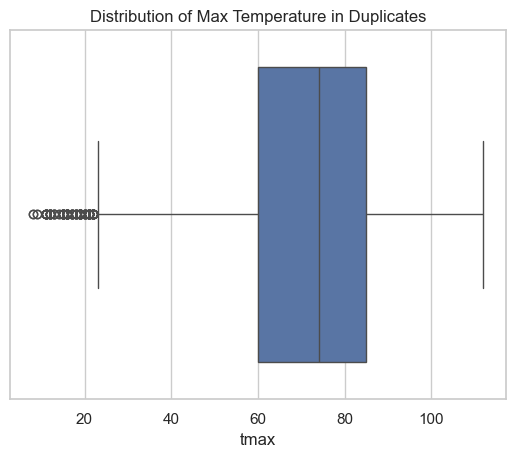

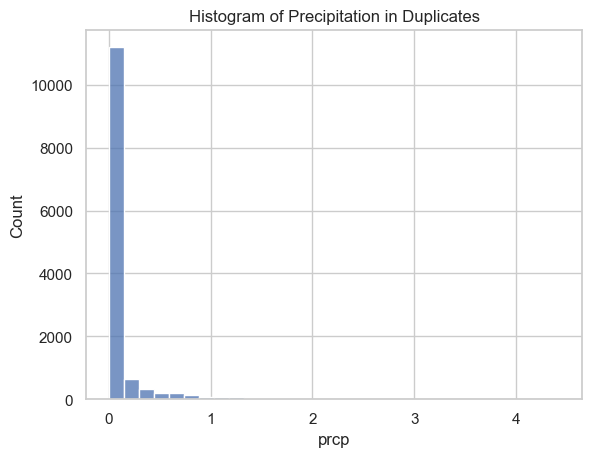

In [204]:
sns.boxplot(data=duplicate_rows, x='tmax')
plt.title('Distribution of Max Temperature in Duplicates')
plt.show()

sns.histplot(duplicate_rows['prcp'], bins=30)
plt.title('Histogram of Precipitation in Duplicates')
plt.show()

In [205]:

# Group the duplicates by the key columns (e.g., date, iata) and aggregate to see how values differ.
grouped_duplicates = duplicate_rows.groupby(['date', 'iata']).agg({'prcp': 'mean', 'tmax': 'mean', 'tmin': 'mean', 'snow': 'mean'}).reset_index()
print(grouped_duplicates)

            date iata  prcp  tmax  tmin  snow
0     2023-05-01  abi  0.00  80.0  55.0   0.0
1     2023-05-01  ads  0.00  76.0  57.0   NaN
2     2023-05-01  afw  0.00  78.0  52.0   NaN
3     2023-05-01  ale   NaN  79.0  54.0   NaN
4     2023-05-01  ali  0.00  90.0  56.0   NaN
...          ...  ...   ...   ...   ...   ...
6823  2024-04-30  sgh  0.39  73.0  53.0   NaN
6824  2024-04-30  tdz  0.12  73.0  57.0   NaN
6825  2024-04-30  tol  0.05  73.0  51.0   0.0
6826  2024-04-30  tup  0.18  78.0  66.0   NaN
6827  2024-04-30  ubs  0.00  87.0  64.0   NaN

[6828 rows x 6 columns]


In [206]:
# Check how many unique values exist for certain columns within the duplicates to see if there’s variability.
print(duplicate_rows.nunique())

latitude      74
longitude     76
elevation     78
date         366
prcp         201
snow          22
snwd          10
tmax         104
tmin          90
tobs          55
city          79
state          7
iata          76
dtype: int64


In [207]:
# Identify which iata codes have the most variability in latitude and longitude.
lat_lon_variability = duplicate_rows.groupby('iata')[['latitude', 'longitude']].nunique()
print(lat_lon_variability[lat_lon_variability > 1])


      latitude  longitude
iata                     
abi        NaN        NaN
ads        NaN        NaN
afw        NaN        NaN
ale        NaN        NaN
ali        NaN        NaN
...        ...        ...
trl        NaN        NaN
tup        NaN        NaN
ubs        NaN        NaN
uva        NaN        NaN
vct        NaN        NaN

[76 rows x 2 columns]


In [208]:
# Check if certain dates have more duplicates and how they vary in terms of weather conditions.
date_variability = duplicate_rows.groupby('date').size().reset_index(name='count')
print(date_variability[date_variability['count'] > 1])

           date  count
0    2023-05-01     90
1    2023-05-02     88
2    2023-05-03     90
3    2023-05-04     90
4    2023-05-05     88
..          ...    ...
361  2024-04-26     38
362  2024-04-27     40
363  2024-04-28     36
364  2024-04-29     40
365  2024-04-30     40

[366 rows x 2 columns]


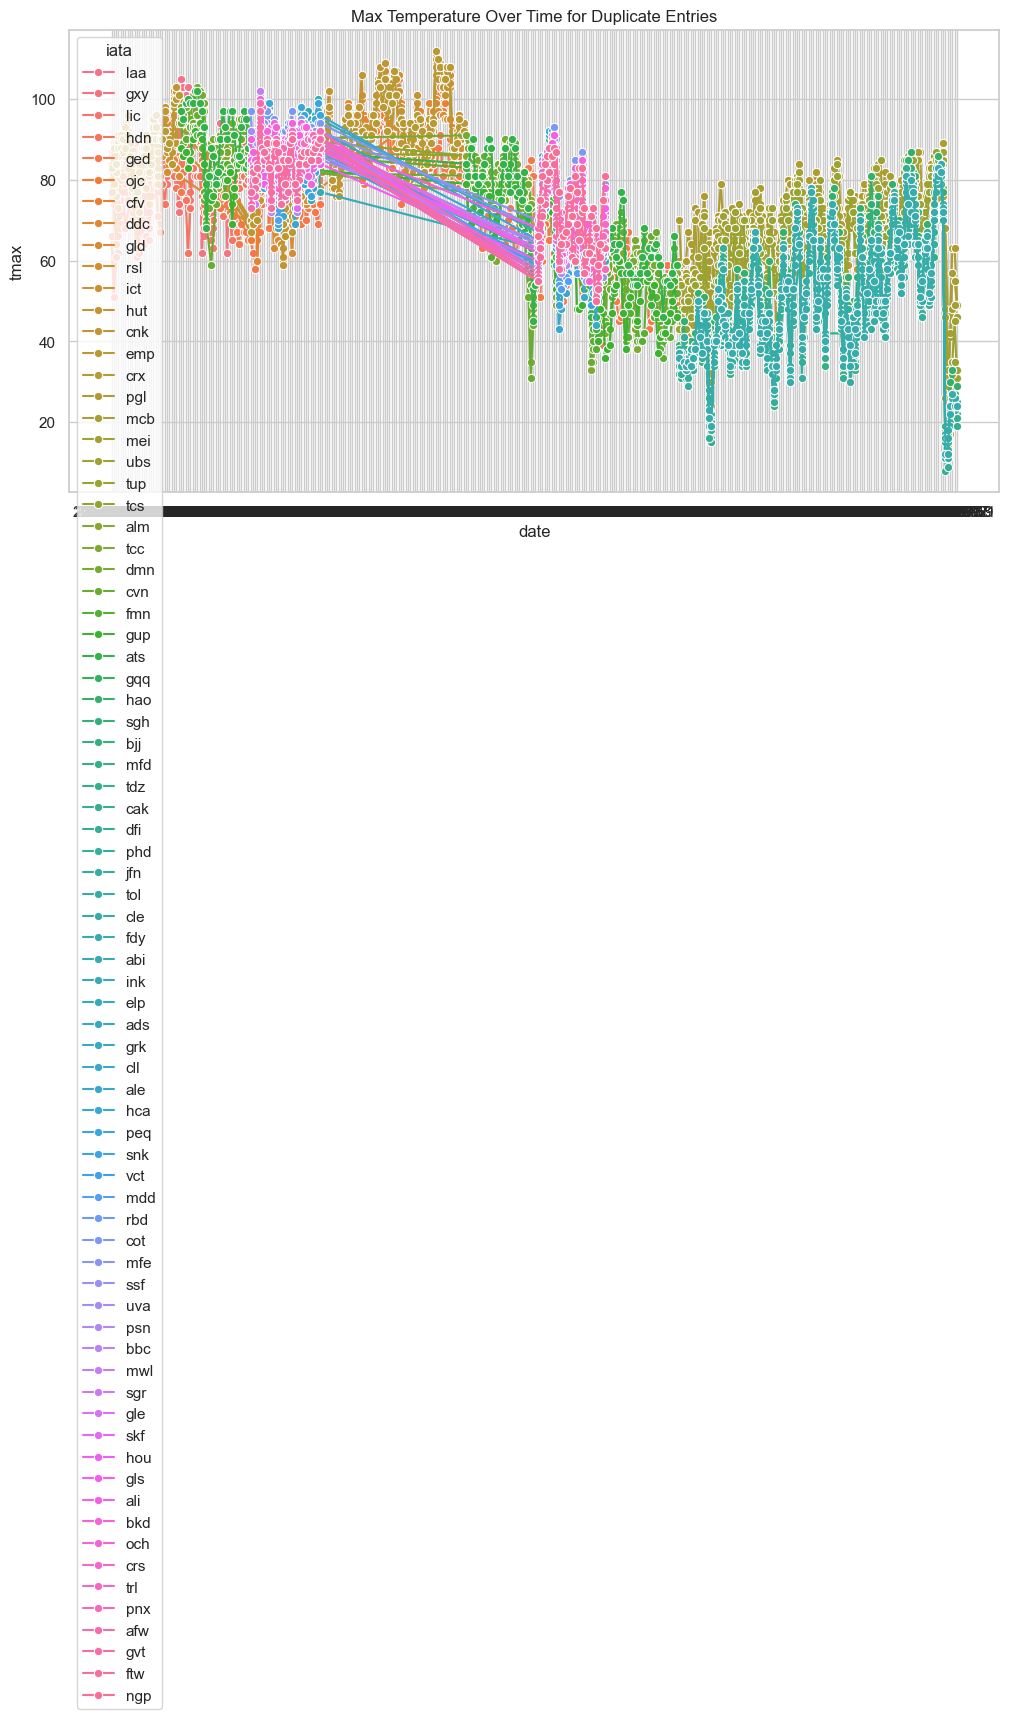

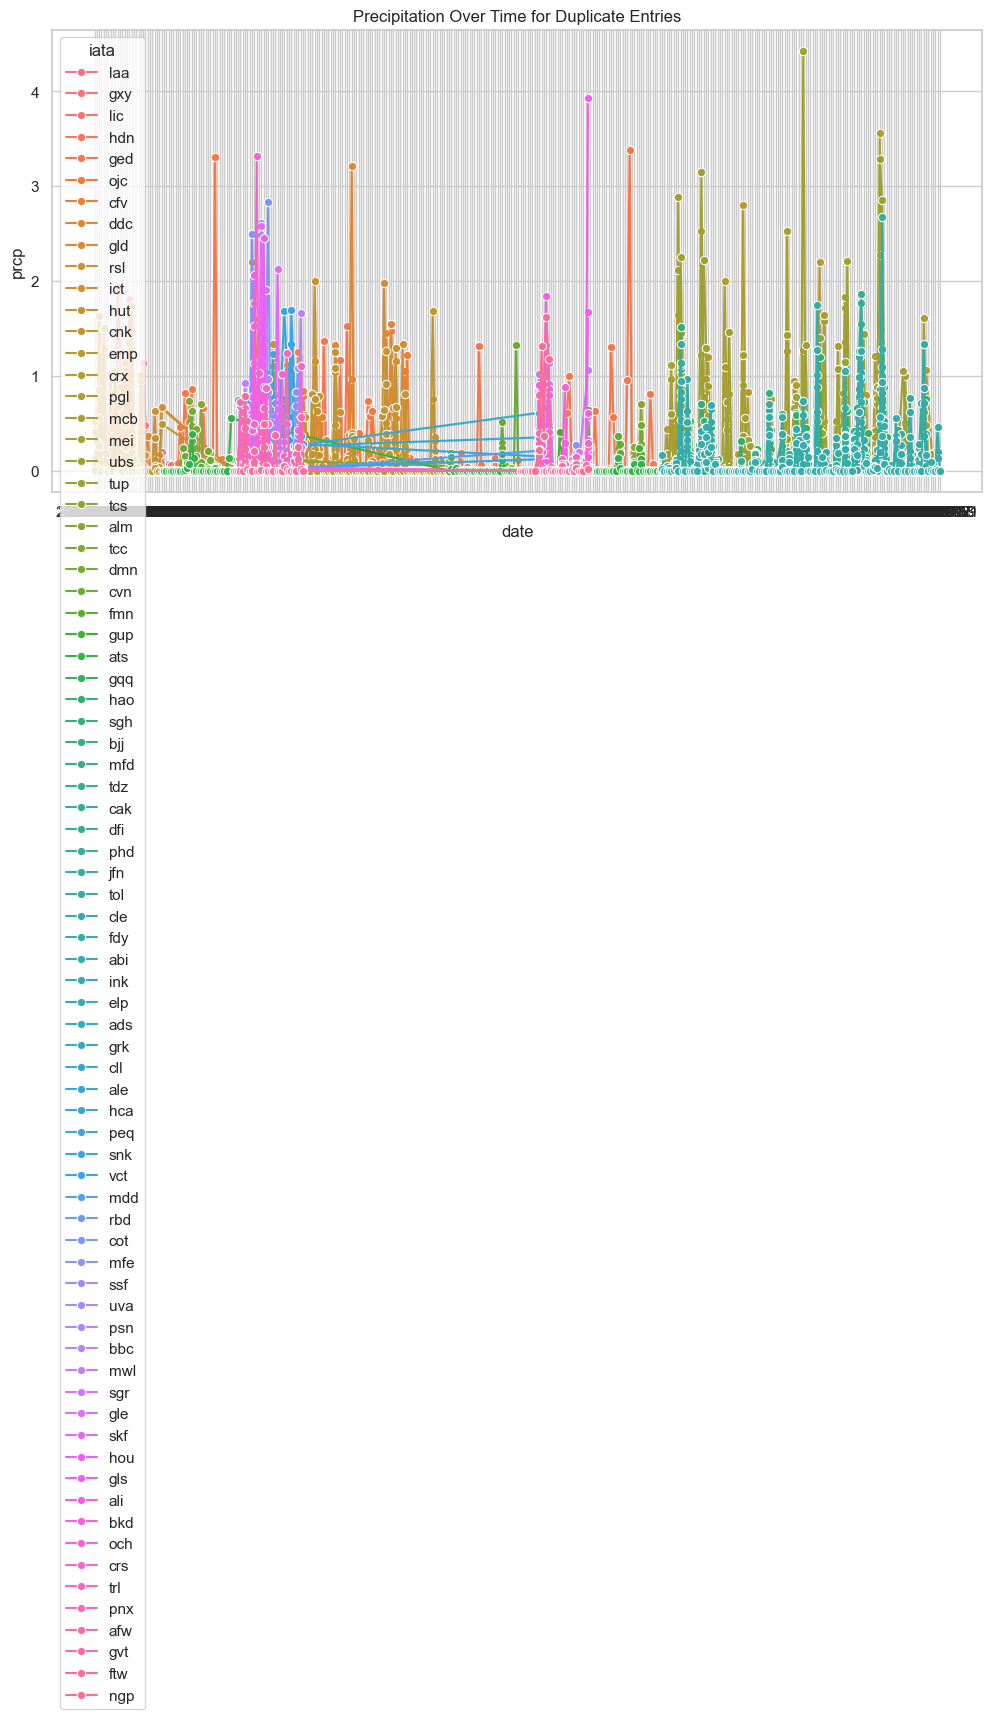

In [209]:
# Create plots to visualize how tmax, tmin, and prcp vary over the dates for the same iata code.
plt.figure(figsize=(12, 6))
sns.lineplot(data=duplicate_rows, x='date', y='tmax', hue='iata', marker='o')
plt.title('Max Temperature Over Time for Duplicate Entries')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=duplicate_rows, x='date', y='prcp', hue='iata', marker='o')
plt.title('Precipitation Over Time for Duplicate Entries')
plt.show()



In [224]:
# Ensure that each iata code consistently points to the same airport name, latitude, longitude, and elevation.
consistency_check = duplicate_rows.groupby('iata')[['latitude', 'longitude', 'elevation']].nunique()
print(consistency_check)


      latitude  longitude  elevation
iata                                
abi          1          1          2
ads          1          1          1
afw          1          1          1
ale          1          1          1
ali          1          1          1
...        ...        ...        ...
trl          1          1          1
tup          1          1          1
ubs          1          1          1
uva          1          1          1
vct          1          1          1

[76 rows x 3 columns]


Data Cleaning

In [226]:
# Handle Missing Values: fill or drop missing values (e.g., mean, median, mode, or dropping rows/columns)

# Drop duplicate rows, keeping the first occurrence
weather_data = weather_data.drop_duplicates(keep='first')

# Optionally, if you want to reset the index after dropping duplicates
weather_data.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(weather_data)

        latitude  longitude    elevation        date  prcp  snow  snwd  tmax  \
0          31.95     -85.13    86.800003  2024-01-01  0.00   NaN   NaN  65.0   
1          31.95     -85.13    86.800003  2024-01-02  0.00   NaN   NaN  55.0   
2          31.95     -85.13    86.800003  2024-01-03  0.14   NaN   NaN  43.0   
3          31.95     -85.13    86.800003  2024-01-04  0.00   NaN   NaN  58.0   
4          31.95     -85.13    86.800003  2024-01-05  0.23   NaN   NaN  61.0   
...          ...        ...          ...         ...   ...   ...   ...   ...   
139007     44.38    -106.72  1503.800049  2023-12-27  0.00   NaN   NaN  44.0   
139008     44.38    -106.72  1503.800049  2023-12-28  0.00   NaN   NaN  50.0   
139009     44.38    -106.72  1503.800049  2023-12-29  0.00   NaN   NaN  48.0   
139010     44.38    -106.72  1503.800049  2023-12-30  0.00   NaN   NaN  49.0   
139011     44.38    -106.72  1503.800049  2023-12-31  0.00   NaN   NaN  47.0   

        tmin  tobs                     

In [227]:
# Check for duplicates
print("Number of flights_data duplicates: " + str(flights_data.duplicated().sum()))
print("Number of weather_data duplicates: " + str(weather_data.duplicated().sum()))

Number of flights_data duplicates: 0
Number of weather_data duplicates: 0


Investigating missing values

In [229]:
# flight_data
# High missing values for carrier_delay, weather_delay, nas_delay, 
# security_delay, and late_aircraft_delay, but we are keeping 
# due to nature of information.
# Moderate Missing Values: tail_num, dep_time, taxi_out, etc.: 
# These have around 1-3% missing values. Filling these with 
# the mean or median, as they are likely to still provide valuable 
# information.

In [230]:
# Impute missing values for numerical variables using median
for col in ['dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
            'arr_time', 'actual_elapsed_time', 'air_time']:
    flights_data[col] = flights_data[col].fillna(flights_data[col].median())

# Impute missing values for the categorical variable
flights_data['tail_num'] = flights_data['tail_num'].fillna(flights_data['tail_num'].mode()[0])

In [231]:
# Calculate the percentage of null values for each column
null_percentage_flights = flights_data.isnull().mean() * 100

# Filter to show only columns with null values
null_percentage_flights = null_percentage_flights[null_percentage_flights > 0]

# Display the result
print(null_percentage_flights)

carrier_delay                79.304943
weather_delay                79.304943
nas_delay                    79.304943
security_delay               79.304943
late_aircraft_delay          79.304943
le_displaced_threshold_ft    90.087513
he_displaced_threshold_ft    90.567452
dtype: float64


In [232]:
# weather_data
# High Missing Values: snow (64.83%) and snwd (67.21%): Since these 
# represent snow-related data, they are considered critical to analysis.
# tobs (94.10%): This column has very high missing values, but we are
# leaving for now because it represents temperatures observed.
# Moderate Missing Values: elevation, prcp, tmax, tmin:
# These have around 4-5% missing values. Filling these with the mean or median.


In [233]:
# fill missing values by state medians

# Define the columns to fill
columns_to_fill = ['prcp', 'tmax', 'tmin', 'elevation']

# Loop through each column to fill missing values
for column in columns_to_fill:
    # Calculate the median by state
    state_medians = weather_data.groupby('state')[column].median()
    
    # Fill missing values in the column with the corresponding state median
    weather_data[column] = weather_data[column].fillna(weather_data['state'].map(state_medians))

# Optionally check the null percentages again
print(weather_data.isnull().mean() * 100)

latitude      0.000000
longitude     0.000000
elevation     0.000000
date          0.000000
prcp          0.000000
snow         64.444077
snwd         66.656116
tmax          0.000000
tmin          0.000000
tobs         94.086122
city          0.000000
state         0.000000
iata          0.000000
dtype: float64


In [234]:
# Compare data for tmax, tmin, and tobs in weather_data

# Check how many records exist for tmax, tmin, and 
# tobs and their missing values.
print(weather_data[['tmax', 'tmin', 'tobs']].isnull().sum())

# Count non-missing records
non_missing_counts = weather_data[['tmax', 'tmin', 'tobs']].count()
print(non_missing_counts)

tmax         0
tmin         0
tobs    130791
dtype: int64
tmax    139012
tmin    139012
tobs      8221
dtype: int64


In [235]:
# Identify Stations Reporting Patterns

# Group by station (iata) and count reports
station_counts = weather_data.groupby('iata')[['tmax', 'tmin', 'tobs']].count()
print(station_counts)


      tmax  tmin  tobs
iata                  
abi    565   565     0
ack    366   366     0
adg    366   366     0
adk    351   351     0
adq    366   366     0
...    ...   ...   ...
wmc    366   366     0
wmh    366   366     0
wrl    366   366     0
wsh    366   366     0
wvi    363   363     0

[391 rows x 3 columns]


In [236]:
only_tmax_tmin = station_counts[station_counts['tobs'] == 0]
print(f"Stations reporting only tmax and tmin: {only_tmax_tmin.shape[0]}")

Stations reporting only tmax and tmin: 362


In [237]:
only_tobs = station_counts[station_counts[['tmax', 'tmin']].isnull().any(axis=1)]
print(f"Stations reporting only tobs: {only_tobs.shape[0]}")


Stations reporting only tobs: 0


In [238]:
# Analyze recording patterns
def recording_pattern(row):
    if pd.notnull(row['tmax']) and pd.notnull(row['tmin']) and pd.isnull(row['tobs']):
        return 'tmax_tmin_only'
    elif pd.isnull(row['tmax']) and pd.isnull(row['tmin']) and pd.notnull(row['tobs']):
        return 'tobs_only'
    elif pd.notnull(row['tmax']) and pd.notnull(row['tmin']) and pd.notnull(row['tobs']):
        return 'all_recorded'
    else:
        return 'other'

weather_data['recording_pattern'] = weather_data[['tmax', 'tmin', 'tobs']].apply(recording_pattern, axis=1)


In [239]:

# count recording patterns
pattern_counts = weather_data['recording_pattern'].value_counts()
print(pattern_counts)


recording_pattern
tmax_tmin_only    130791
all_recorded        8221
Name: count, dtype: int64


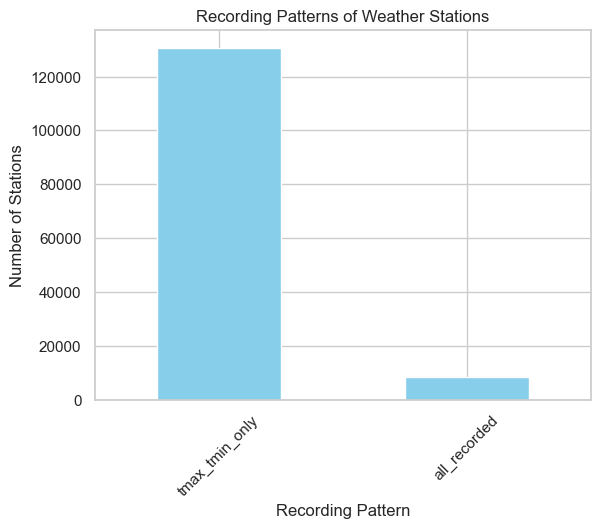

In [240]:
#  bar chart to visualize the distribution of recording patterns

pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Recording Patterns of Weather Stations')
plt.xlabel('Recording Pattern')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

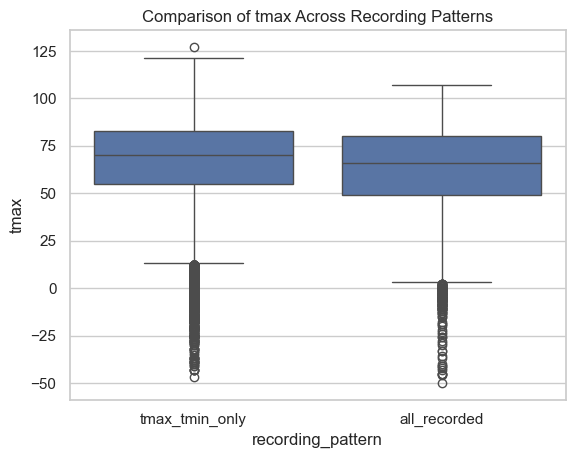

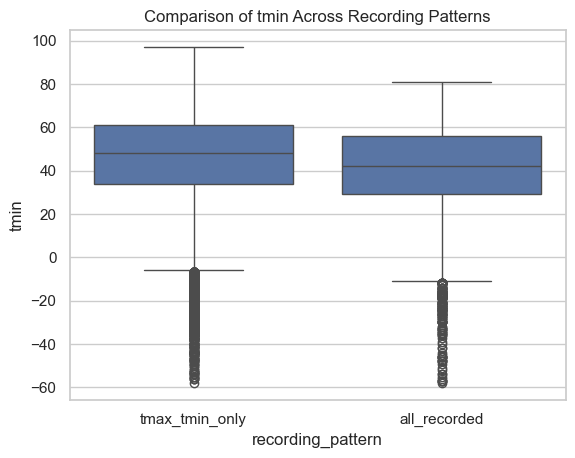

In [241]:
sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmax')
plt.title('Comparison of tmax Across Recording Patterns')
plt.show()

sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmin')
plt.title('Comparison of tmin Across Recording Patterns')
plt.show()


In [242]:
# Drop tobs column
weather_data.drop(columns=['tobs'], inplace=True)
print(weather_data.head())

   latitude  longitude  elevation        date  prcp  snow  snwd  tmax  tmin  \
0     31.95     -85.13  86.800003  2024-01-01  0.00   NaN   NaN  65.0  32.0   
1     31.95     -85.13  86.800003  2024-01-02  0.00   NaN   NaN  55.0  27.0   
2     31.95     -85.13  86.800003  2024-01-03  0.14   NaN   NaN  43.0  27.0   
3     31.95     -85.13  86.800003  2024-01-04  0.00   NaN   NaN  58.0  31.0   
4     31.95     -85.13  86.800003  2024-01-05  0.23   NaN   NaN  61.0  29.0   

                           city state iata recording_pattern  
0  eufaula weedon field airport    al  euf    tmax_tmin_only  
1  eufaula weedon field airport    al  euf    tmax_tmin_only  
2  eufaula weedon field airport    al  euf    tmax_tmin_only  
3  eufaula weedon field airport    al  euf    tmax_tmin_only  
4  eufaula weedon field airport    al  euf    tmax_tmin_only  


In [243]:
# Check how many records exist and their missing values.
print(weather_data.isnull().sum())

# Count non-missing records
non_missing_counts = weather_data.count()
print(non_missing_counts)

latitude                 0
longitude                0
elevation                0
date                     0
prcp                     0
snow                 89585
snwd                 92660
tmax                     0
tmin                     0
city                     0
state                    0
iata                     0
recording_pattern        0
dtype: int64
latitude             139012
longitude            139012
elevation            139012
date                 139012
prcp                 139012
snow                  49427
snwd                  46352
tmax                 139012
tmin                 139012
city                 139012
state                139012
iata                 139012
recording_pattern    139012
dtype: int64


In [244]:
# Check how many records exist and their missing values.
print(flights_data.isnull().sum())

# Count non-missing records
non_missing_counts = flights_data.count()
print(non_missing_counts)

day_of_week                         0
date                                0
op_unique_carrier                   0
tail_num                            0
op_carrier_fl_num                   0
origin_iata                         0
origin_city                         0
dest_iata                           0
dest_city                           0
crs_dep_time                        0
dep_time                            0
taxi_out                            0
wheels_off                          0
wheels_on                           0
taxi_in                             0
crs_arr_time                        0
arr_time                            0
cancelled                           0
diverted                            0
crs_elapsed_time                    0
actual_elapsed_time                 0
air_time                            0
flights                             0
distance                            0
distance_group                      0
carrier_delay                11970618
weather_dela

In [245]:
# Standardize column names
flights_data.columns = flights_data.columns.str.lower().str.replace(' ', '_')
weather_data.columns = weather_data.columns.str.lower().str.replace(' ', '_')


In [246]:
print(flights_data.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...      id  \
0         cvg  cincinnati       msp  minneapolis          1234  ...  240940   
1         cvg  cincinnati       msp  minneapolis          1234  ...  240941   
2         cvg  cincinnati       msp  minneapolis          1234  ...  240943   
3         cvg  cincinnati       msp  minneapolis          1234  ...  240942   
4         dsm  des moines       msp  minneapolis          1750  ...  244170   

   length_ft  width_ft  surface  lighted  closed  le_ident  \
0    1

In [247]:
print(weather_data.head())

   latitude  longitude  elevation        date  prcp  snow  snwd  tmax  tmin  \
0     31.95     -85.13  86.800003  2024-01-01  0.00   NaN   NaN  65.0  32.0   
1     31.95     -85.13  86.800003  2024-01-02  0.00   NaN   NaN  55.0  27.0   
2     31.95     -85.13  86.800003  2024-01-03  0.14   NaN   NaN  43.0  27.0   
3     31.95     -85.13  86.800003  2024-01-04  0.00   NaN   NaN  58.0  31.0   
4     31.95     -85.13  86.800003  2024-01-05  0.23   NaN   NaN  61.0  29.0   

                           city state iata recording_pattern  
0  eufaula weedon field airport    al  euf    tmax_tmin_only  
1  eufaula weedon field airport    al  euf    tmax_tmin_only  
2  eufaula weedon field airport    al  euf    tmax_tmin_only  
3  eufaula weedon field airport    al  euf    tmax_tmin_only  
4  eufaula weedon field airport    al  euf    tmax_tmin_only  


In [266]:
# Mapping dictionary
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Convert numeric days to day names
flights_data['day_of_week'] = flights_data['day_of_week'].replace(day_mapping)

# Display the updated DataFrame
print(flights_data.head(3))

  day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0      Monday  2023-05-01                9e   n131ev               4888   
1      Monday  2023-05-01                9e   n131ev               4888   
2      Monday  2023-05-01                9e   n131ev               4888   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  surface  \
0         cvg  cincinnati       msp  minneapolis           754  ...      PEM   
1         cvg  cincinnati       msp  minneapolis           754  ...      PEM   
2         cvg  cincinnati       msp  minneapolis           754  ...      CON   

   lighted  closed  le_ident  le_displaced_threshold_ft  he_ident  \
0        1       0        09                        NaN        27   
1        1       0       18C                        NaN       36C   
2        1       0       18L                        NaN       36R   

   he_displaced_threshold_ft  arrival_delay  departure_delay  delay  
0                        NaN   

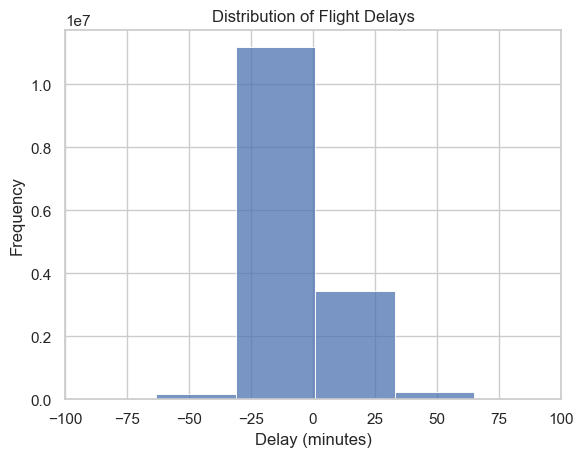

In [248]:
# Flight Delays: Analyze the distribution of flight delays.
sns.histplot(flights_data['actual_elapsed_time'] - flights_data['crs_elapsed_time'], bins=50)
plt.title('Distribution of Flight Delays')

# Set the limits for the x-axis
plt.xlim(-100, 100)  # Adjust based on the distribution

plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


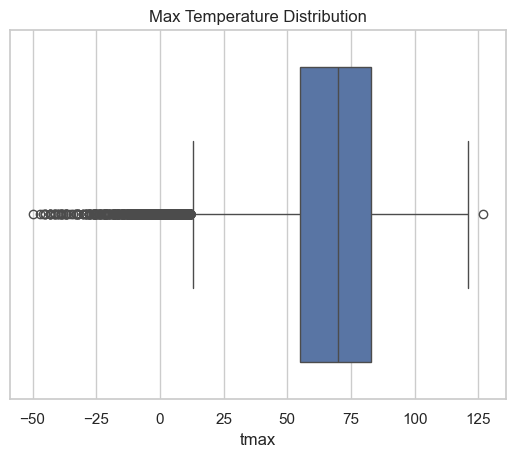

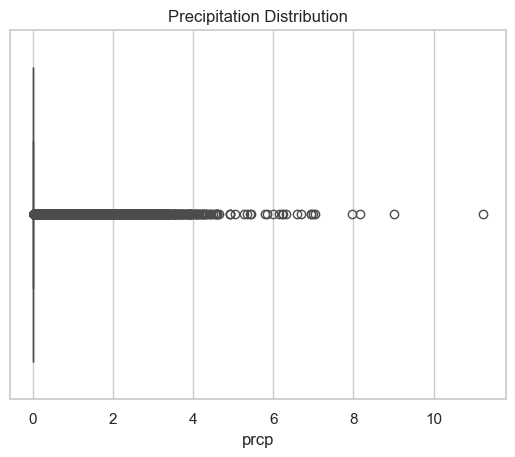

In [249]:
# Weather Variables: Analyze temperature and precipitation.

sns.boxplot(x='tmax', data=weather_data)
plt.title('Max Temperature Distribution')
plt.show()

sns.boxplot(x='prcp', data=weather_data)
plt.title('Precipitation Distribution')
plt.show()


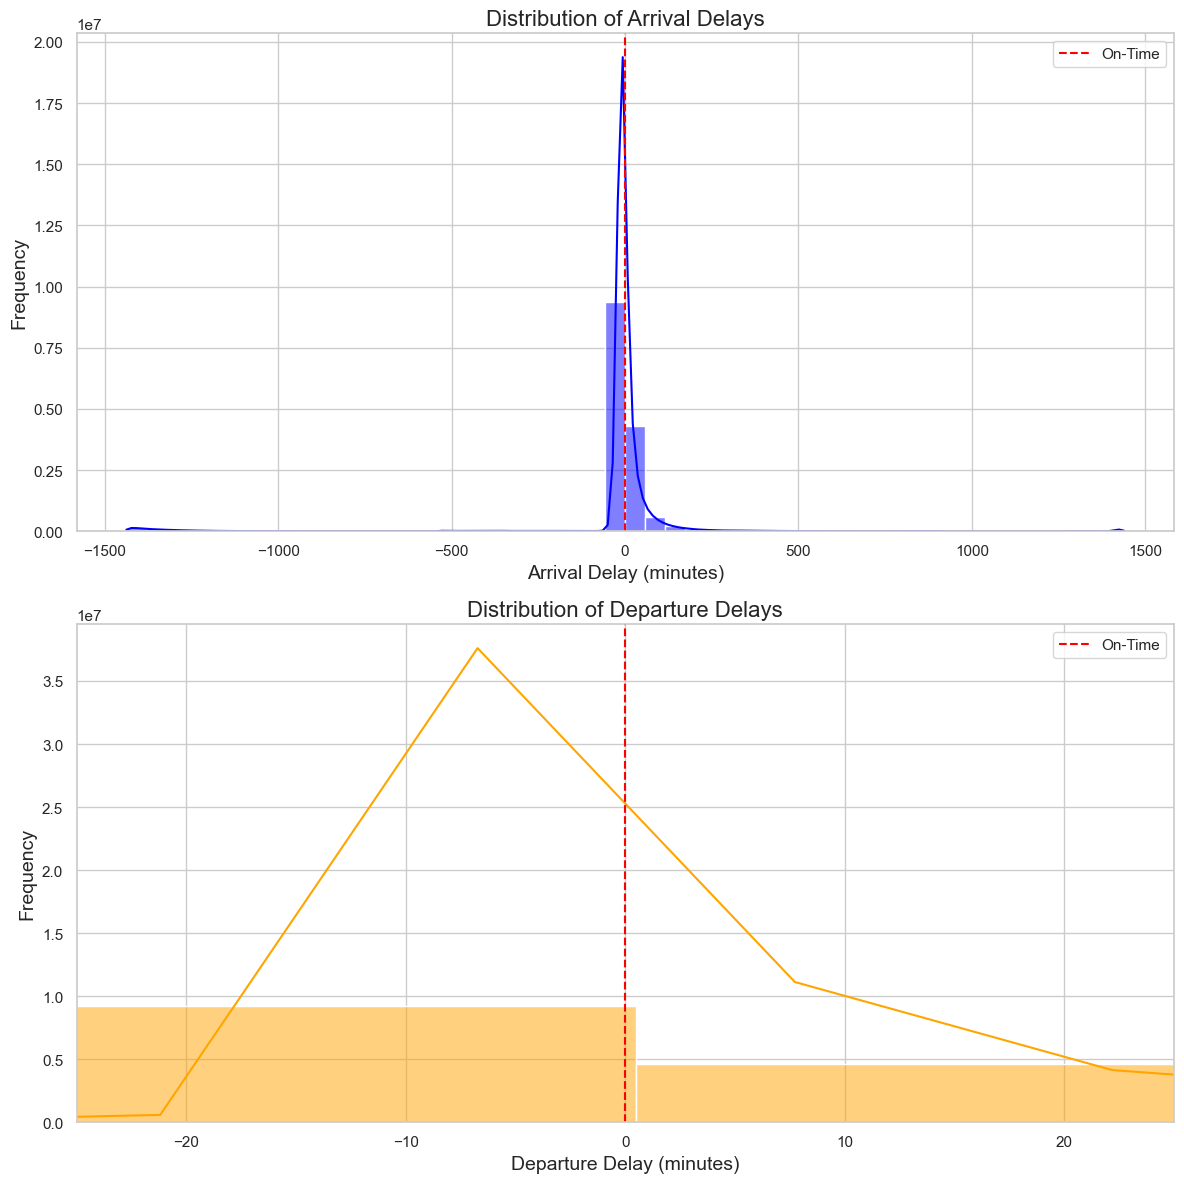

In [250]:
# Assuming crs_arr_time and arr_time are in HHMM format, convert them to minutes
flights_data['crs_arr_time'] = flights_data['crs_arr_time'] // 100 * 60 + flights_data['crs_arr_time'] % 100
flights_data['arr_time'] = flights_data['arr_time'] // 100 * 60 + flights_data['arr_time'] % 100

# Calculate arrival delay
flights_data['arrival_delay'] = flights_data['arr_time'] - flights_data['crs_arr_time']

# Assuming crs_dep_time and dep_time are also in HHMM format, convert them similarly
flights_data['crs_dep_time'] = flights_data['crs_dep_time'] // 100 * 60 + flights_data['crs_dep_time'] % 100
flights_data['dep_time'] = flights_data['dep_time'] // 100 * 60 + flights_data['dep_time'] % 100

# Calculate departure delay
flights_data['departure_delay'] = flights_data['dep_time'] - flights_data['crs_dep_time']

# Set the plot style
sns.set(style='whitegrid')

# Create subplots for arrival and departure delays
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plotting Arrival Delays
sns.histplot(flights_data['arrival_delay'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Arrival Delays', fontsize=16)
axes[0].set_xlabel('Arrival Delay (minutes)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].axvline(x=0, color='red', linestyle='--', label='On-Time')
# Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[0].legend()

# Plotting Departure Delays
sns.histplot(flights_data['departure_delay'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Departure Delays', fontsize=16)
axes[1].set_xlabel('Departure Delay (minutes)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].axvline(x=0, color='red', linestyle='--', label='On-Time')
# Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

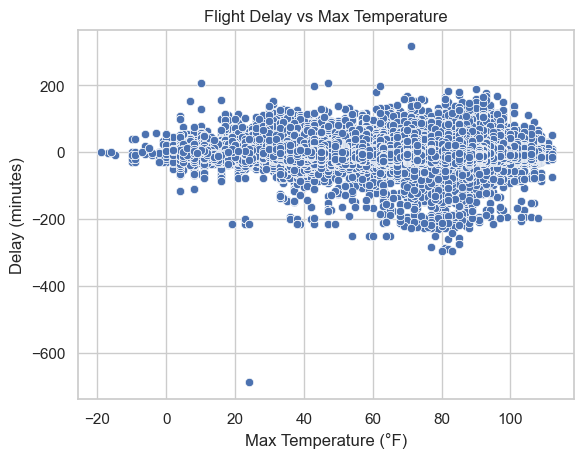

In [252]:
# Correlation between delays and weather:
combined_data = flights_data.merge(weather_data, on=['date', 'iata'], how='left')

# Calculate the delay
combined_data['delay'] = combined_data['actual_elapsed_time'] - combined_data['crs_elapsed_time']

# Create the scatterplot
sns.scatterplot(x='tmax', y='delay', data=combined_data)
plt.title('Flight Delay vs Max Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay (minutes)')
plt.show()




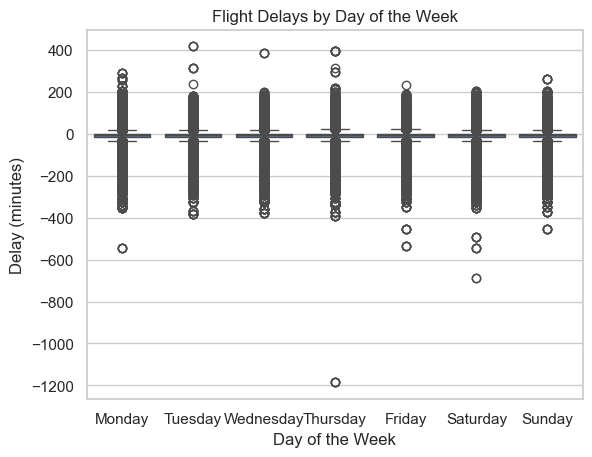

In [268]:
# Delays by days of week
# Calculate the delay
flights_data['delay'] = flights_data['actual_elapsed_time'] - flights_data['crs_elapsed_time']

# Delays by days of week
sns.boxplot(x='day_of_week', y='delay', data=flights_data)
plt.title('Flight Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay (minutes)')
plt.show()


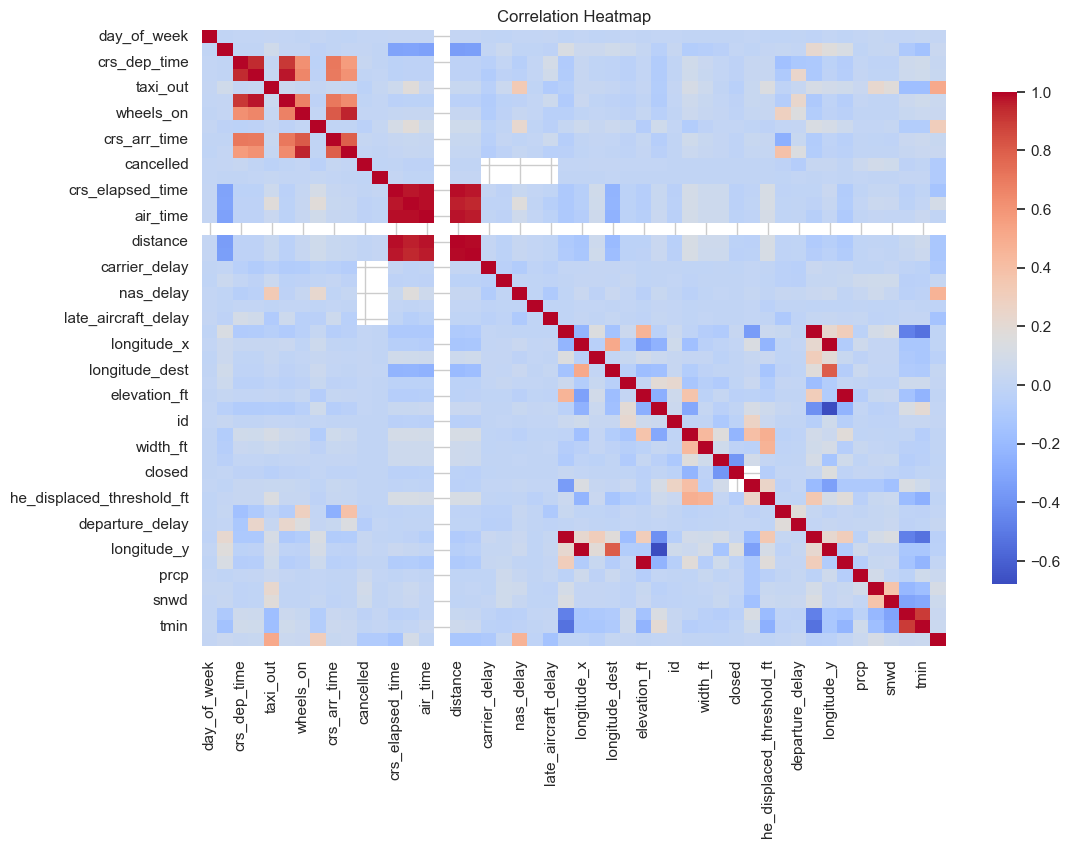

In [275]:
# Select only numeric columns for correlation
numeric_data = combined_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

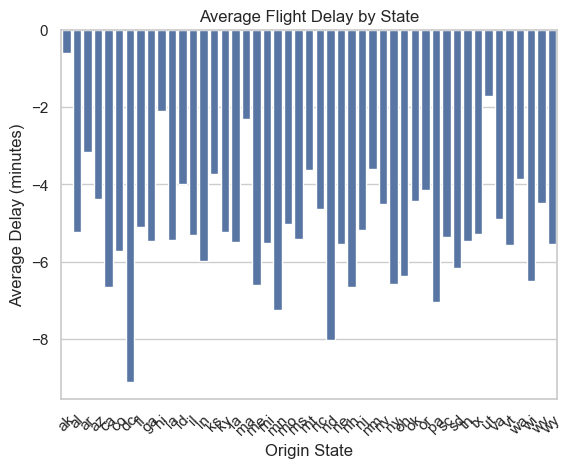

In [276]:
# Flight delays by state

# Calculate the delay
flights_data['delay'] = flights_data['actual_elapsed_time'] - flights_data['crs_elapsed_time']

# Flight delays by state
avg_delay_by_state = flights_data.groupby('origin_state')['delay'].mean().reset_index()

# Create the bar plot
sns.barplot(x='origin_state', y='delay', data=avg_delay_by_state)
plt.title('Average Flight Delay by State')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Origin State')
plt.show()



C:\Users\hopeh\AppData\Local\Temp\ipykernel_10472\1890569730.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hopeh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


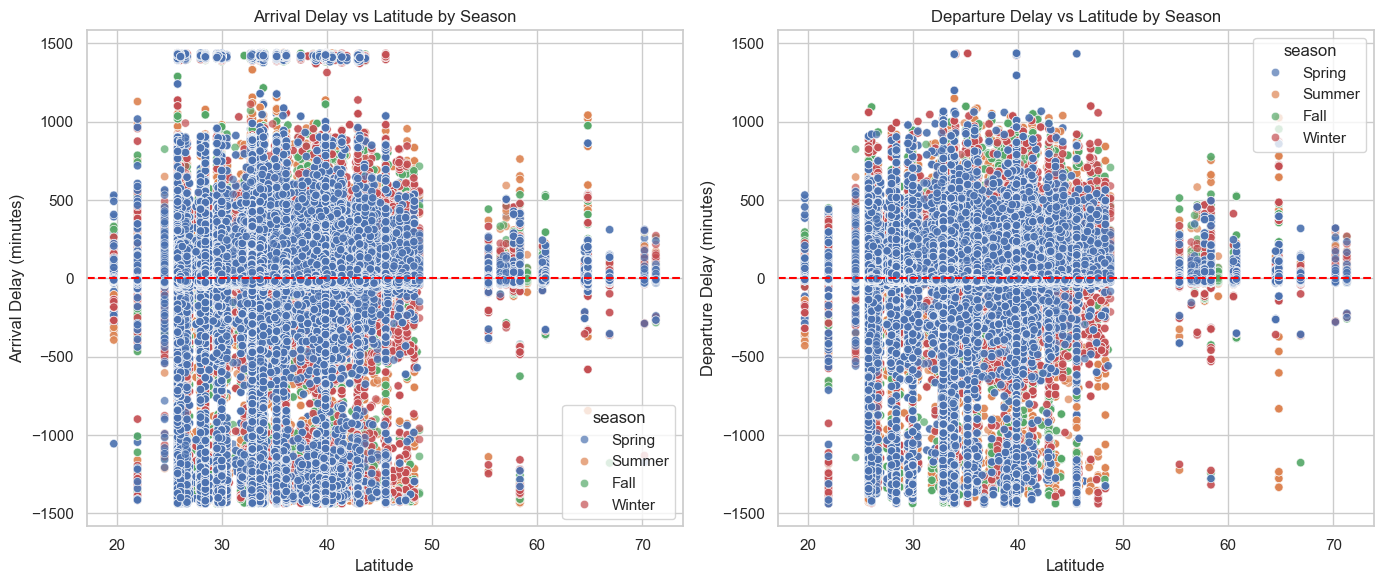

Arrival Delay Correlation with Latitude:
    season        level_1  latitude  longitude  arrival_delay  departure_delay
0     Fall       latitude  1.000000  -0.216918       0.025070        -0.000529
1     Fall      longitude -0.216918   1.000000      -0.006673         0.014424
2     Fall  arrival_delay  0.025070  -0.006673       1.000000         0.152541
4   Spring       latitude  1.000000  -0.241841       0.027462        -0.004486
5   Spring      longitude -0.241841   1.000000      -0.002356         0.011399
6   Spring  arrival_delay  0.027462  -0.002356       1.000000         0.158954
8   Summer       latitude  1.000000  -0.221948       0.042047         0.000998
9   Summer      longitude -0.221948   1.000000      -0.019607         0.011785
10  Summer  arrival_delay  0.042047  -0.019607       1.000000         0.193225
12  Winter       latitude  1.000000  -0.249334       0.025234         0.009668
13  Winter      longitude -0.249334   1.000000      -0.006917         0.014602
14  Winter 

In [285]:
# # Flight delays by latitudes and longitudes

# flights_data['date'] = pd.to_datetime(flights_data['date'])

# # Create a season column
# def get_season(month):
#     if month in [12, 1, 2]:
#         return 'Winter'
#     elif month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     else:
#         return 'Fall'

# flights_data['season'] = flights_data['date'].dt.month.apply(get_season)

# # Combine relevant data
# data_for_correlation = flights_data[['latitude', 'longitude', 'arrival_delay', 'departure_delay', 'season']]

# # Correlation Analysis
# # Calculate correlation coefficients by season
# correlation_results = data_for_correlation.groupby('season').corr().reset_index()

# # Extracting the relevant correlation data
# arrival_corr = correlation_results[correlation_results['level_1'].isin(['arrival_delay', 'latitude', 'longitude'])]
# departure_corr = correlation_results[correlation_results['level_1'].isin(['departure_delay', 'latitude', 'longitude'])]

# # Visualization
# plt.figure(figsize=(14, 6))

# # Scatter plot for Arrival Delay vs Latitude
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=flights_data, x='latitude', y='arrival_delay', hue='season', alpha=0.7)
# plt.title('Arrival Delay vs Latitude by Season')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Arrival Delay (minutes)')

# # Scatter plot for Departure Delay vs Latitude
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=flights_data, x='latitude', y='departure_delay', hue='season', alpha=0.7)
# plt.title('Departure Delay vs Latitude by Season')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Departure Delay (minutes)')

# plt.tight_layout()
# plt.show()

# # Print correlation coefficients
# # calculate correlations between delays and latitude/longitude. 
# # The results are grouped by season to see how the relationships change.
# print("Arrival Delay Correlation with Latitude:")
# print(arrival_corr)
# print("\nDeparture Delay Correlation with Latitude:")
# print(departure_corr)

Some seasonal correlations are slightly positive (e.g., Summer Arrival Delay: 0.042, Winter Departure Delay: 0.009668), but these values are still weak.

Similar to latitude, longitude also shows low correlation with delays. Most values are close to zero, indicating no significant relationship.

Explore other factors that might impact delays, such as weather conditions (precipitation, snow), airport traffic, or operational factors (e.g., carrier delays).

Consider using statistical models (like linear regression) to analyze the influence of various factors, including latitude, longitude, and weather, on flight delays.

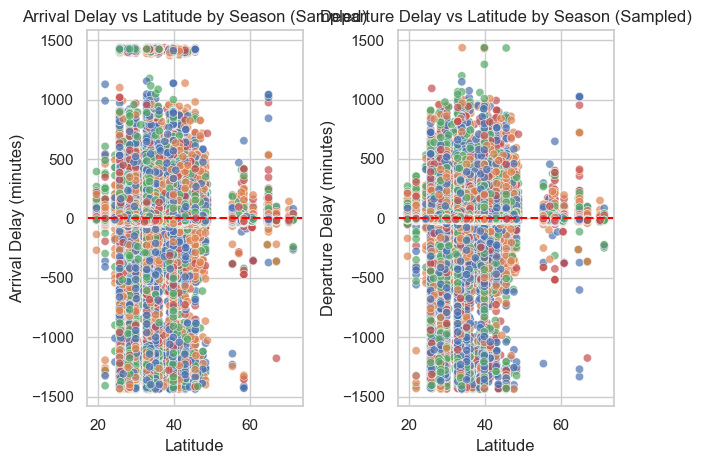

In [287]:
# Sample 10% of the data for plotting
sampled_data = flights_data.sample(frac=0.1, random_state=1)

# Scatter plot for Arrival Delay vs Latitude (using sampled data)
plt.subplot(1, 2, 1)
sns.scatterplot(data=sampled_data, x='latitude', y='arrival_delay', hue='season', alpha=0.7)
plt.title('Arrival Delay vs Latitude by Season (Sampled)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Latitude')
plt.ylabel('Arrival Delay (minutes)')
# Remove legend
plt.legend([], [], frameon=False)

# Scatter plot for Departure Delay vs Latitude (using sampled data)
plt.subplot(1, 2, 2)
sns.scatterplot(data=sampled_data, x='latitude', y='departure_delay', hue='season', alpha=0.7)
plt.title('Departure Delay vs Latitude by Season (Sampled)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Latitude')
plt.ylabel('Departure Delay (minutes)')
# Remove legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
# Feature engineering

# Create new features
flights_data['delay'] = flights_data['actual_elapsed_time'] - flights_data['crs_elapsed_time']
flights_data['is_weekend'] = flights_data['day_of_week'].isin([5, 6]).astype(int)  # Saturday and Sunday


In [289]:
# # Print correlation coefficients
# # calculate correlations between delays and latitude/longitude. 
# # The results are grouped by season to see how the relationships change.
print("Arrival Delay Correlation with Latitude:")
print(arrival_corr)
print("\nDeparture Delay Correlation with Latitude:")
print(departure_corr)

Arrival Delay Correlation with Latitude:
    season        level_1  latitude  longitude  arrival_delay  departure_delay
0     Fall       latitude  1.000000  -0.216918       0.025070        -0.000529
1     Fall      longitude -0.216918   1.000000      -0.006673         0.014424
2     Fall  arrival_delay  0.025070  -0.006673       1.000000         0.152541
4   Spring       latitude  1.000000  -0.241841       0.027462        -0.004486
5   Spring      longitude -0.241841   1.000000      -0.002356         0.011399
6   Spring  arrival_delay  0.027462  -0.002356       1.000000         0.158954
8   Summer       latitude  1.000000  -0.221948       0.042047         0.000998
9   Summer      longitude -0.221948   1.000000      -0.019607         0.011785
10  Summer  arrival_delay  0.042047  -0.019607       1.000000         0.193225
12  Winter       latitude  1.000000  -0.249334       0.025234         0.009668
13  Winter      longitude -0.249334   1.000000      -0.006917         0.014602
14  Winter 

In [ ]:
# Flight delays vs elevation analysis
# Calculate Correlation Coefficients

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot delays vs elevation
def plot_delay_vs_elevation(data):
    plt.figure(figsize=(14, 6))

    # Arrival Delay
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x='elevation_ft', y='arrival_delay', hue='season', alpha=0.7)
    plt.title('Arrival Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Arrival Delay (minutes)')

    # Departure Delay
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='elevation_ft', y='departure_delay', hue='season', alpha=0.7)
    plt.title('Departure Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Departure Delay (minutes)')

    plt.tight_layout()
    plt.show()

# Calculate Correlation Coefficients
elevation_delay_corr = flights_data.groupby('season')[['elevation_ft', 'arrival_delay', 'departure_delay']].corr()
elevation_delay_corr = elevation_delay_corr.reset_index()

# Extracting relevant correlation data
arrival_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'arrival_delay']
departure_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'departure_delay']

# Call the plotting function
plot_delay_vs_elevation(flights_data)

# Print correlation coefficients
print("Arrival Delay Correlation with Elevation:")
print(arrival_elevation_corr[['season', 'elevation_ft', 'arrival_delay', 'level_1']])
print("\nDeparture Delay Correlation with Elevation:")
print(departure_elevation_corr[['season', 'elevation_ft', 'departure_delay', 'level_1']])


C:\Users\hopeh\AppData\Local\Temp\ipykernel_10472\3880020036.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


In [ ]:
# Scatter plots show the relationship between elevation and both arrival 
# and departure delays, colored by season. This helps visualize any patterns.

In [ ]:
# Columns from flights_data: we keep IATA, date, and delay columns
flights_columns = ['origin_iata', 'dest_iata', 'date', 'arrival_delay', 'departure_delay']
flights_data_reduced = flights_data[flights_columns]

# Columns from weather_data: we keep IATA, date, and weather-related columns
weather_columns = ['iata', 'date', 'elevation', 'prcp', 'snow', 'snwd', 'tmax', 'tmin']
weather_data_reduced = weather_data[weather_columns]

# Merge the DataFrames

# Merge for origin weather
origin_weather = flights_data_reduced.merge(weather_data_reduced, how='left', 
                                             left_on=['origin_iata', 'date'], 
                                             right_on=['iata', 'date'], 
                                             suffixes=('', '_origin'))

# Merge for destination weather
full_data = origin_weather.merge(weather_data_reduced, how='left', 
                                  left_on=['dest_iata', 'date'], 
                                  right_on=['iata', 'date'], 
                                  suffixes=('', '_dest'))

# Select relevant columns after merging
full_data = full_data[['arrival_delay', 'departure_delay', 
                       'elevation_origin', 'prcp_origin', 'snow_origin', 'snwd_origin', 'tmax_origin', 'tmin_origin',
                       'elevation_dest', 'prcp_dest', 'snow_dest', 'snwd_dest', 'tmax_dest', 'tmin_dest']]

# Prepare the Data
# Filter out to sample??

# Correlation Analysis
correlation_matrix = full_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization
plt.figure(figsize=(16, 10))

# Scatter plot for Arrival Delay vs Precipitation (origin)
plt.subplot(2, 2, 1)
sns.scatterplot(data=full_data, x='prcp_origin', y='arrival_delay', alpha=0.6)
plt.title('Arrival Delay vs Precipitation (Origin)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Arrival Delay (minutes)')

# Scatter plot for Departure Delay vs Precipitation (origin)
plt.subplot(2, 2, 2)
sns.scatterplot(data=full_data, x='prcp_origin', y='departure_delay', alpha=0.6)
plt.title('Departure Delay vs Precipitation (Origin)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Departure Delay (minutes)')

# Box plot for Arrival Delay based on Snow (Origin)
plt.subplot(2, 2, 3)
sns.boxplot(data=full_data, x='snow_origin', y='arrival_delay')
plt.title('Arrival Delay vs Snow (Origin)')
plt.xlabel('Snow (inches)')
plt.ylabel('Arrival Delay (minutes)')

# Box plot for Departure Delay based on Snow (Origin)
plt.subplot(2, 2, 4)
sns.boxplot(data=full_data, x='snow_origin', y='departure_delay')
plt.title('Departure Delay vs Snow (Origin)')
plt.xlabel('Snow (inches)')
plt.ylabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()

In [ ]:
# Investigate whether a positive departure delay indicates a positive arrival delay
# Visualize the relationship between departure delay and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_data, x='departure_delay', y='arrival_delay', alpha=0.6)
plt.title('Departure Delay vs Arrival Delay')
plt.axhline(0, color='red', linestyle='--', label='Zero Arrival Delay')  # Reference line for zero arrival delay
plt.axvline(0, color='blue', linestyle='--', label='Zero Departure Delay')  # Reference line for zero departure delay
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = flights_data['departure_delay'].corr(flights_data['arrival_delay'])
print(f"Correlation between Departure Delay and Arrival Delay: {correlation:.2f}")


In [ ]:
# Identify features to use for modeling, considering their correlation with delays.

In [ ]:
# arrival_delay
# departure_delay


In [ ]:
#Model preparation

#Train-test split
# Assuming full_data is your DataFrame with features and target
X = full_data.drop(columns=['arrival_delay'])  # Features
y = full_data['arrival_delay']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming full_data is your DataFrame with features and target
X = full_data.drop(columns=['arrival_delay'])  # Features
y = full_data['arrival_delay']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Normalize/standardize features as needed
# "Standardization (Z-score Normalization): Centers the feature 
# around 0 with a standard deviation of 1. This is often preferred
# for algorithms like SVM, k-means, and PCA."

# Standardization
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Save scaled data into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save to CSV if needed
X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)

In [ ]:
# Mean, Sum, Count: For time-based features, calculate statistics over certain time windows.
df['daily_mean_delay'] = df.groupby('date')['arrival_delay'].transform('mean')
